In [1]:
from utility.raport_helper_functions import *
recipe_data = load_recipe_data()

# Projekt z przedmiotu *Eksploracja Danych*

## Etap 1: Zrozumienie problemu i danych

### Analizowany zbiór danych: **Brewer's Friend Beer Recipes**

#### Autorzy:
- Anna Sztukowska 188803
- Michał Sugalski 193290
- Lucjan Gackowski 193150

#### Ogólny opis zbioru

Zbiór **Brewer's Friend Beer Recipes** zawiera dane dotyczące domowych receptur piwa udostępnianych przez użytkowników platformy Brewer's Friend – narzędzia wspierającego amatorskich i półprofesjonalnych piwowarów. Każdy wiersz odpowiada jednej recepturze i zawiera ogólne parametry techniczne związane z procesem warzenia.
Dane obejmują szeroki zakres ogólnych parametrów warzenia, takich jak styl piwa, zawartość alkoholu (ABV), poziom goryczki (IBU), kolor (SRM), gęstość początkowa (OG) i końcowa (FG), metoda warzenia (np. all grain, extract), objętości na różnych etapach produkcji, a także temperatury fermentacji.
Dane mają postać numeryczną lub kategoryczną i mogą służyć do analizy trendów, porównań stylów piwa, klasteryzacji receptur lub budowy modeli predykcyjnych opartych na parametrach fizykochemicznych trunku.


#### Charakterystyka zbioru danych
- **Pochodzenie:** Dane zostały zebrane z platformy Brewer's Friend i udostępnione na Kaggle przez użytkownika jtrofe.
- **Format:** `.csv`
- **Liczba przykładów:** ponad 75 000 receptur piwa
- **Liczba atrybutów:** 23 kolumny opisujące właściwości każdej receptury
- **Struktura:** Zbiór składa się z dwóch plików:
  - `recipeData.csv` – główny zbiór zawierający informacje o recepturach piwa
  - `styleData.csv` – uzupełniający zbiór zawierający opisy stylów piwa

#### Wyniki eksploracyjnej analizy danych

##### Rozkłady wartości atrybutów
Już po wstępnej analizie zbioru danych zauważyliśmy, że spora część atrybutów numerycznych (między innymi: `Size(L)`, `OG`, `FG`, `ABV`, `IBU`, `BoilSize`...) ma rozkład, w którym możemy zaobserwować dużą koncentrację próbek w relatywnie małym przedziale. Równocześnie, zaobserwowaliśmy obecność wartości znacznie odbiegających od innych (outlier'ów) - z tych powodów, do naszej analizy rozkładu wartości atrybutów oprócz histogramów, załączyliśmy także dodatkowe informacje statystyczne, takie jak średnia, odchylenie standardowe, wartości minimalne i maksymalne oraz liczba próbek dla tych wartości, natomiast przede wszystkim zdecydowaliśmy się na uwzględnienie kwantyli rozkładu (`Q1 - 25%`, `Q2 - 50%`, `Q3 - 75%`) oraz liczby próbek dla wartości powyżej `Q3`. Posiadając takie informacje, byliśmy w stanie przygotować histogramy dla rozkładów w zakresie `IQR (Interquartile Range - rozstępu miedzykwartylowego)` zakładając, że dana wartość jest outlierem, jeśli:
- jest mniejsza niż `Q1 - 1.5 * IQR`, lub
- jest większa niż `Q3 + 1.5 * IQR`

Dzięki temu, jesteśmy w stanie lepiej zrozumieć rozkład wartości atrybutów i ich potencjalny wpływ na dalsze analizy.

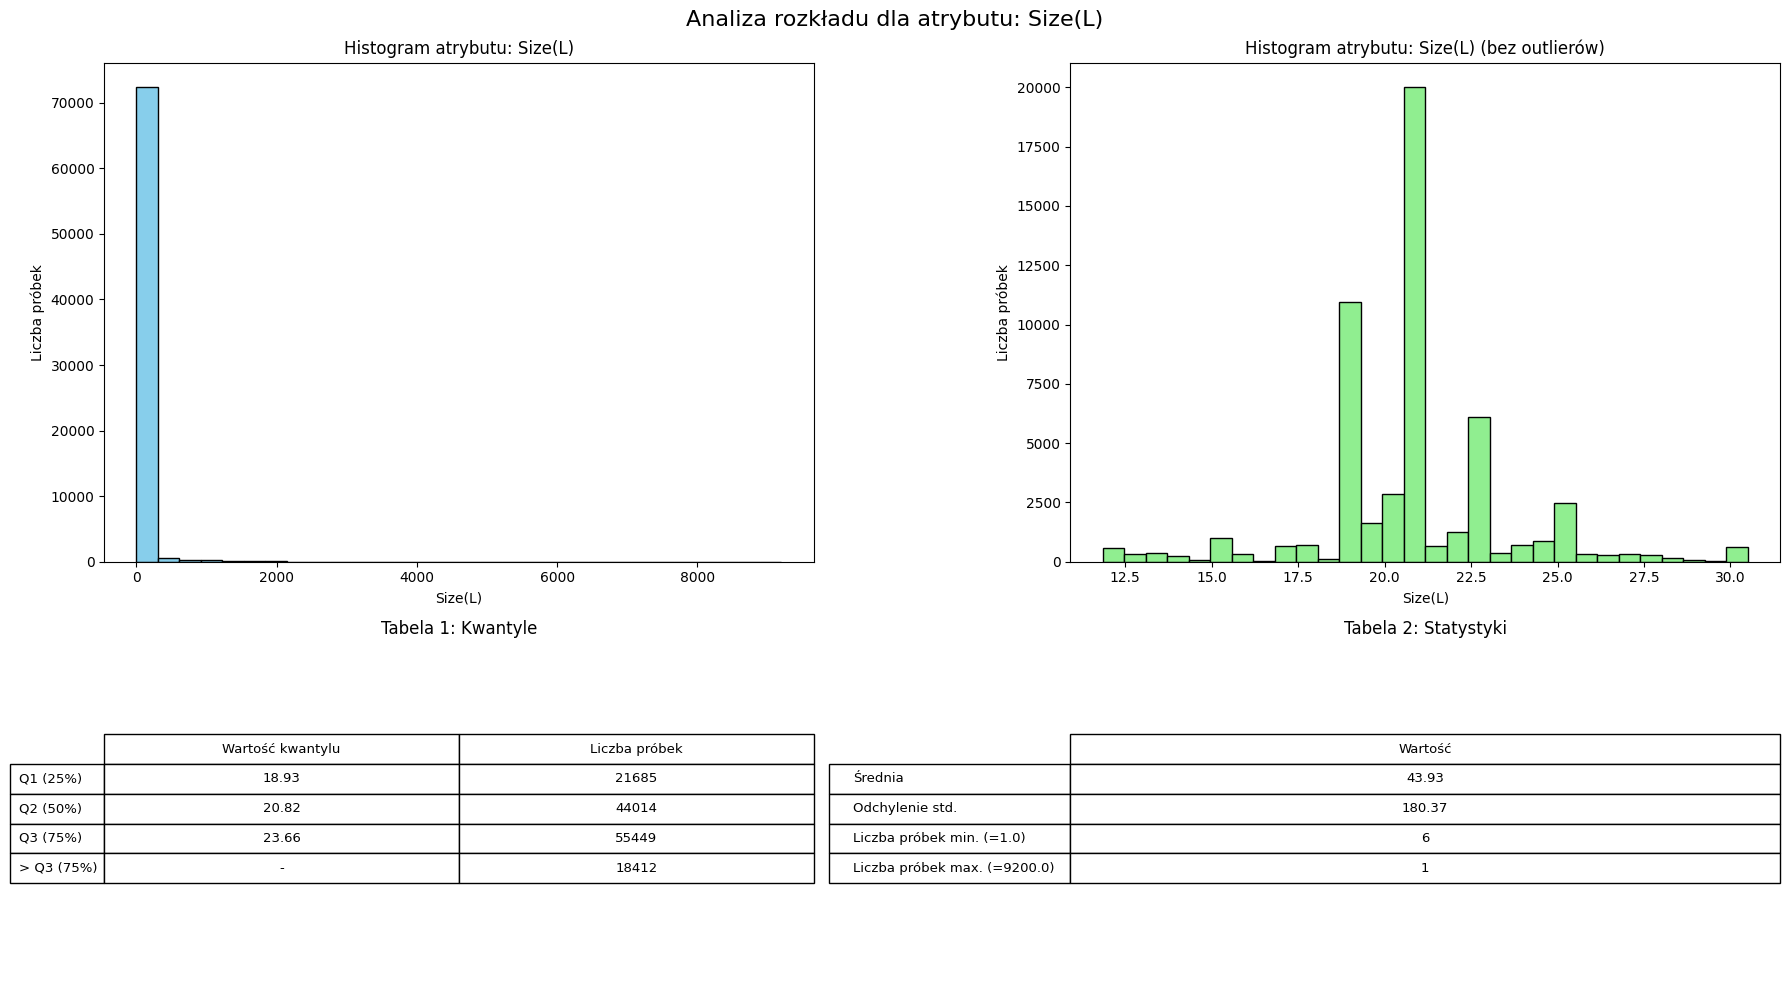

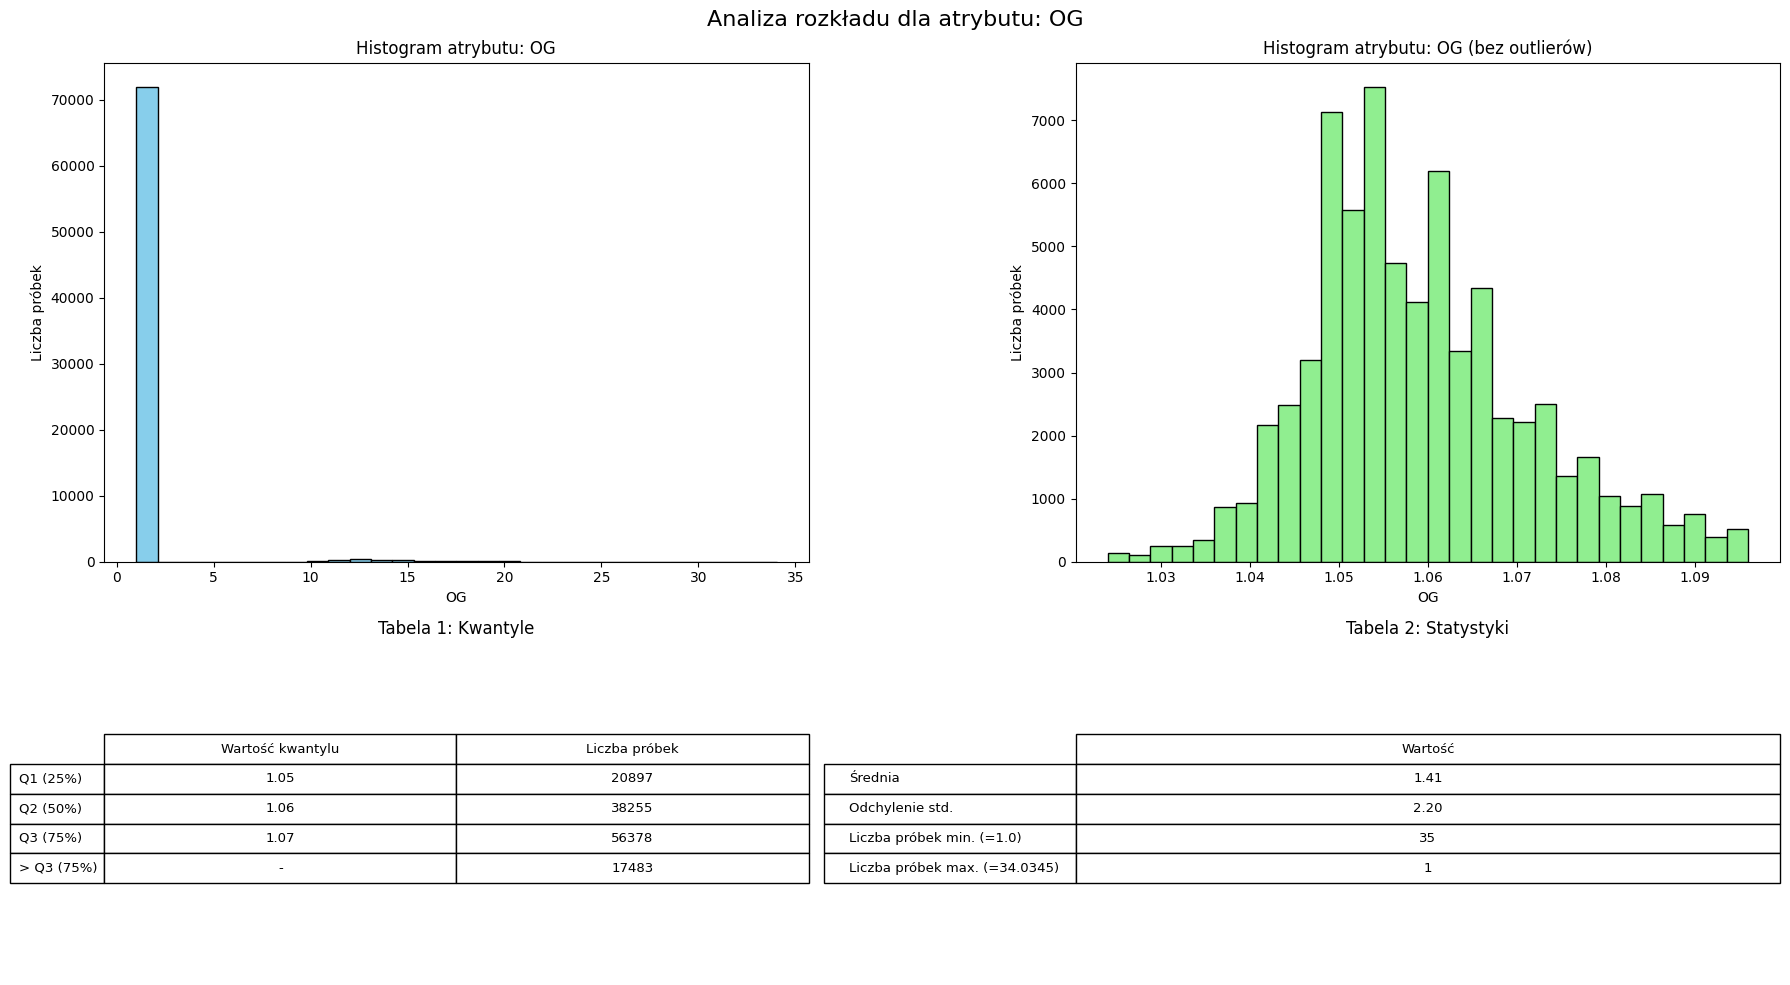

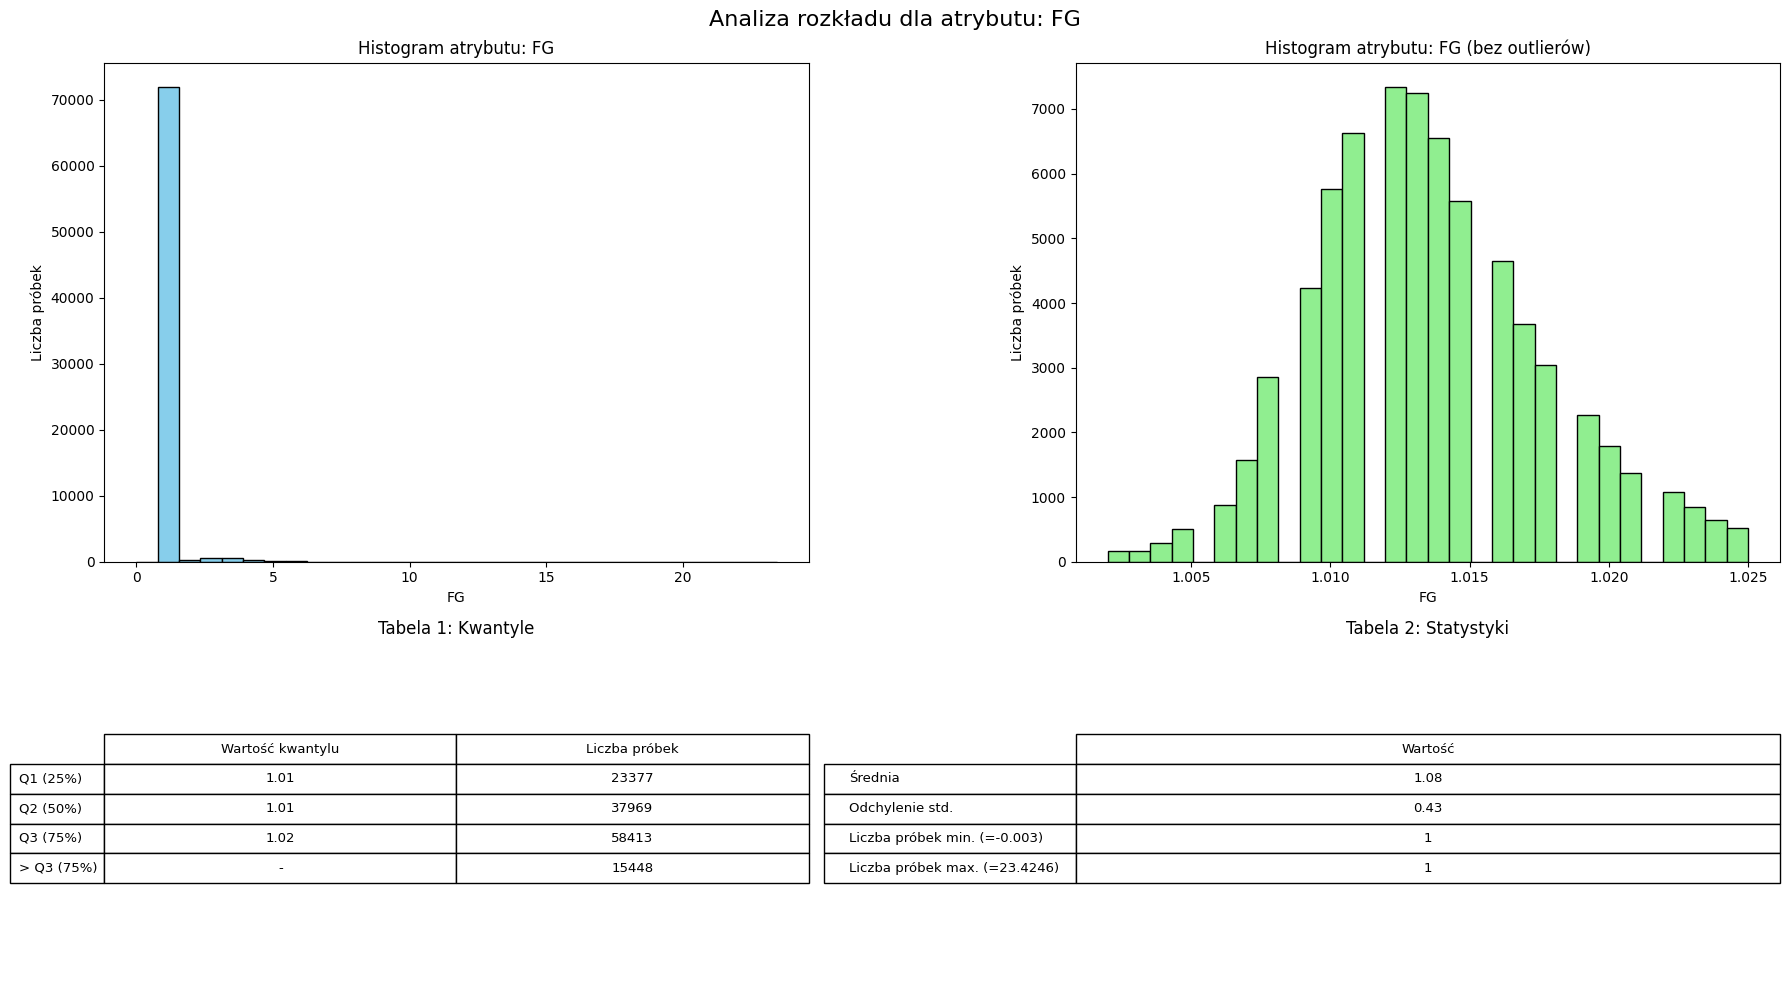

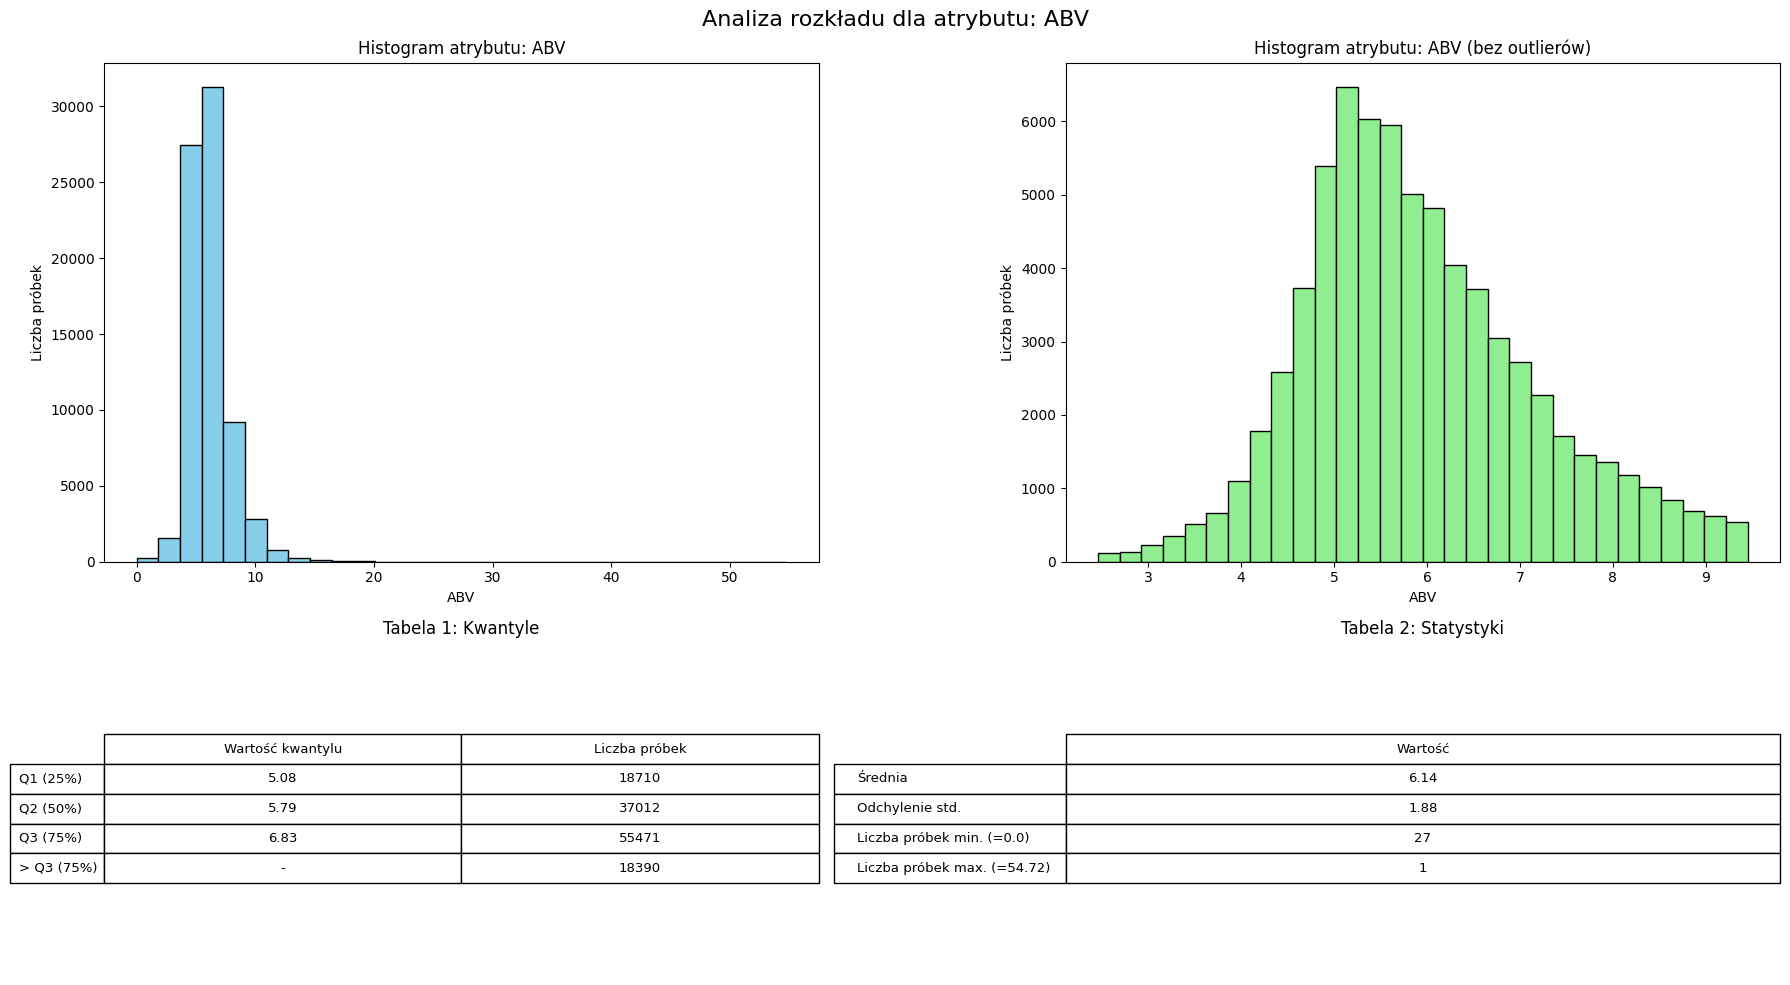

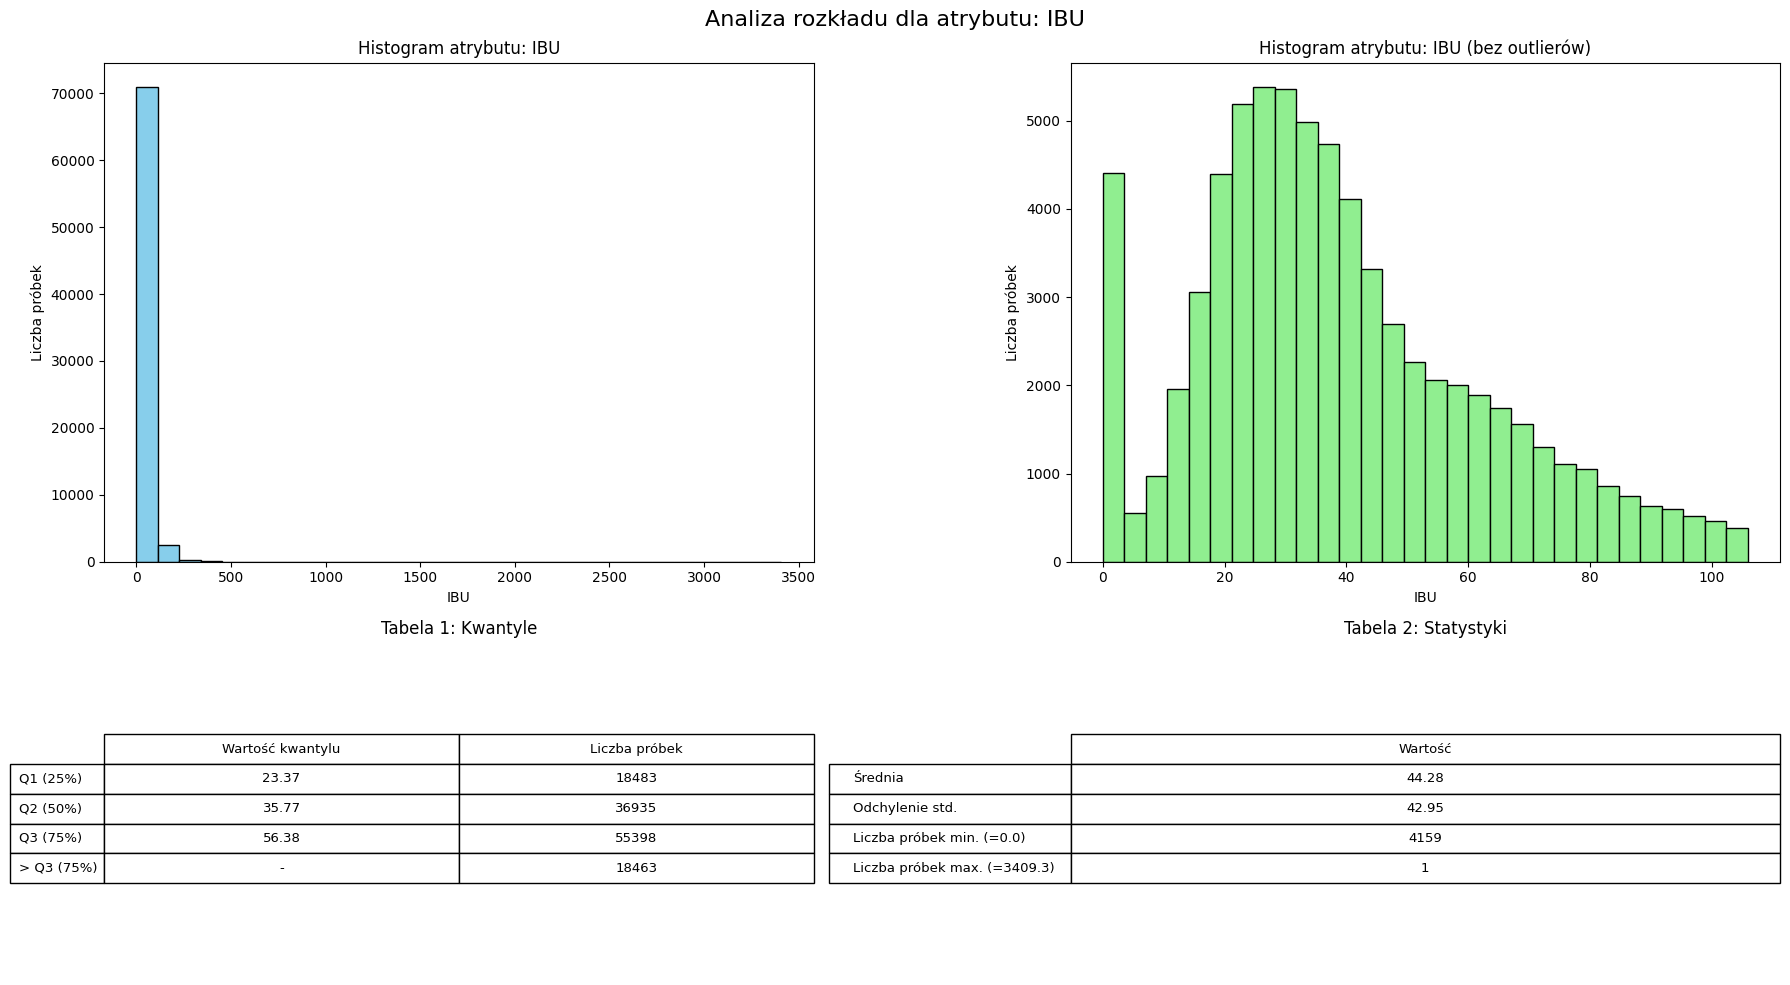

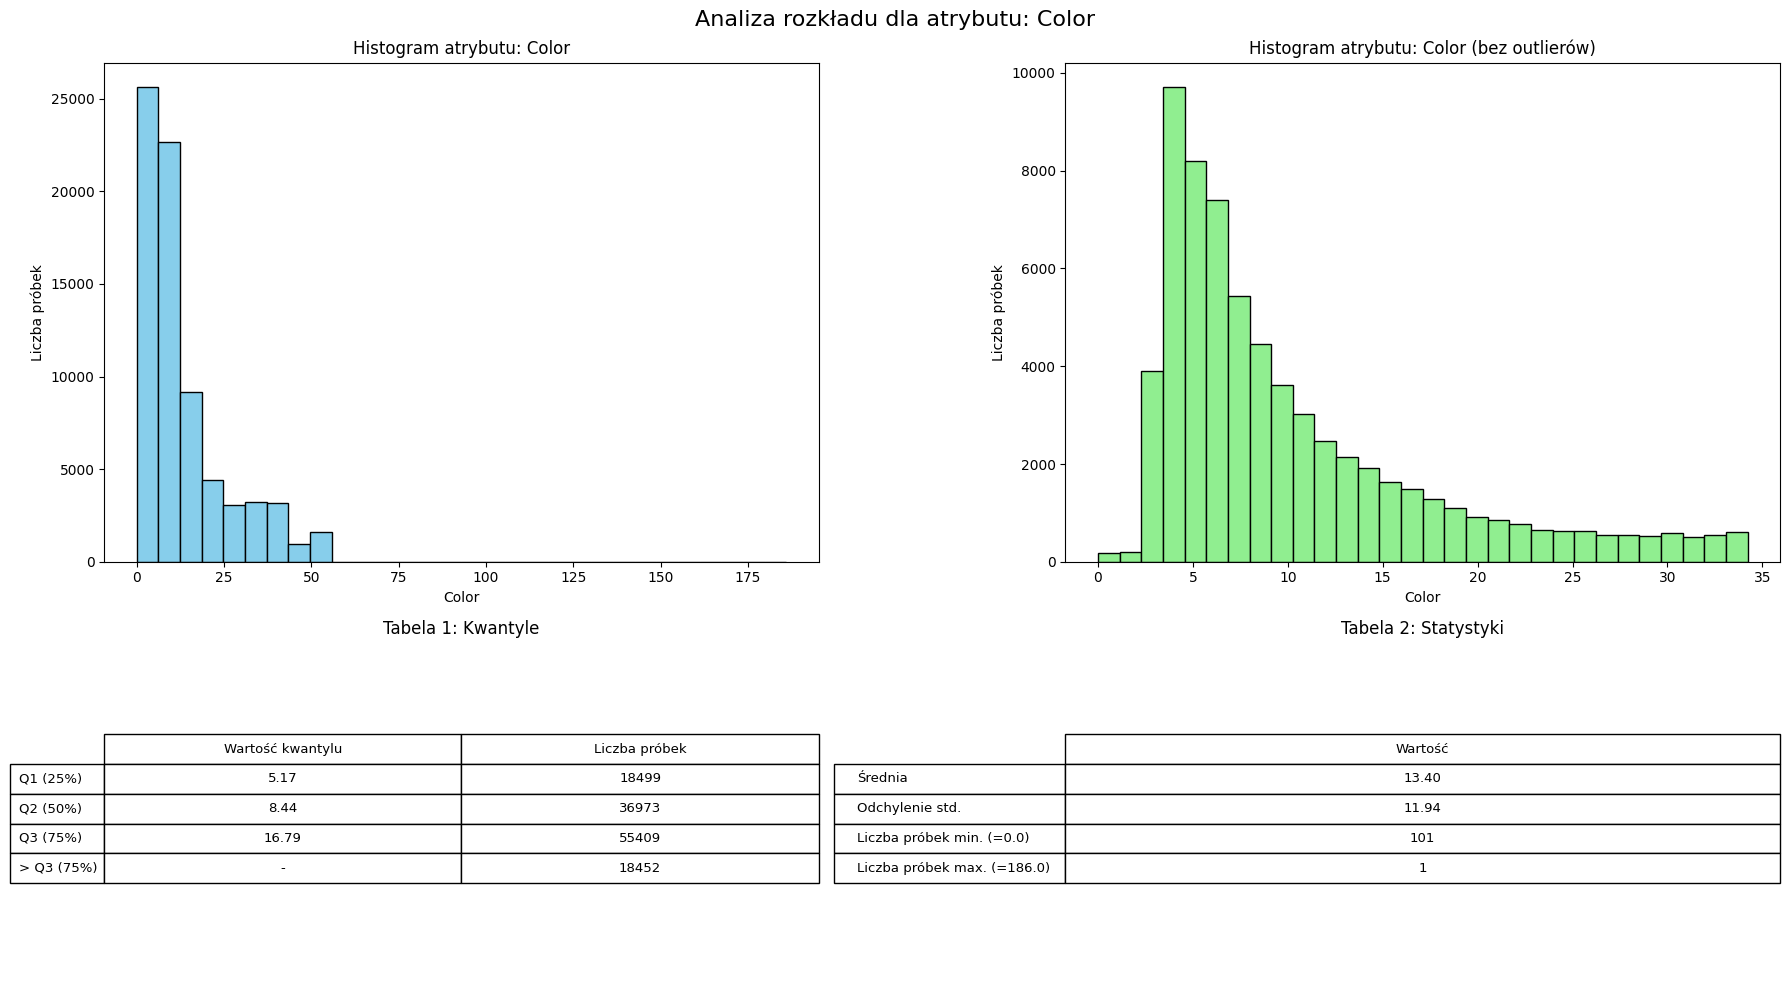

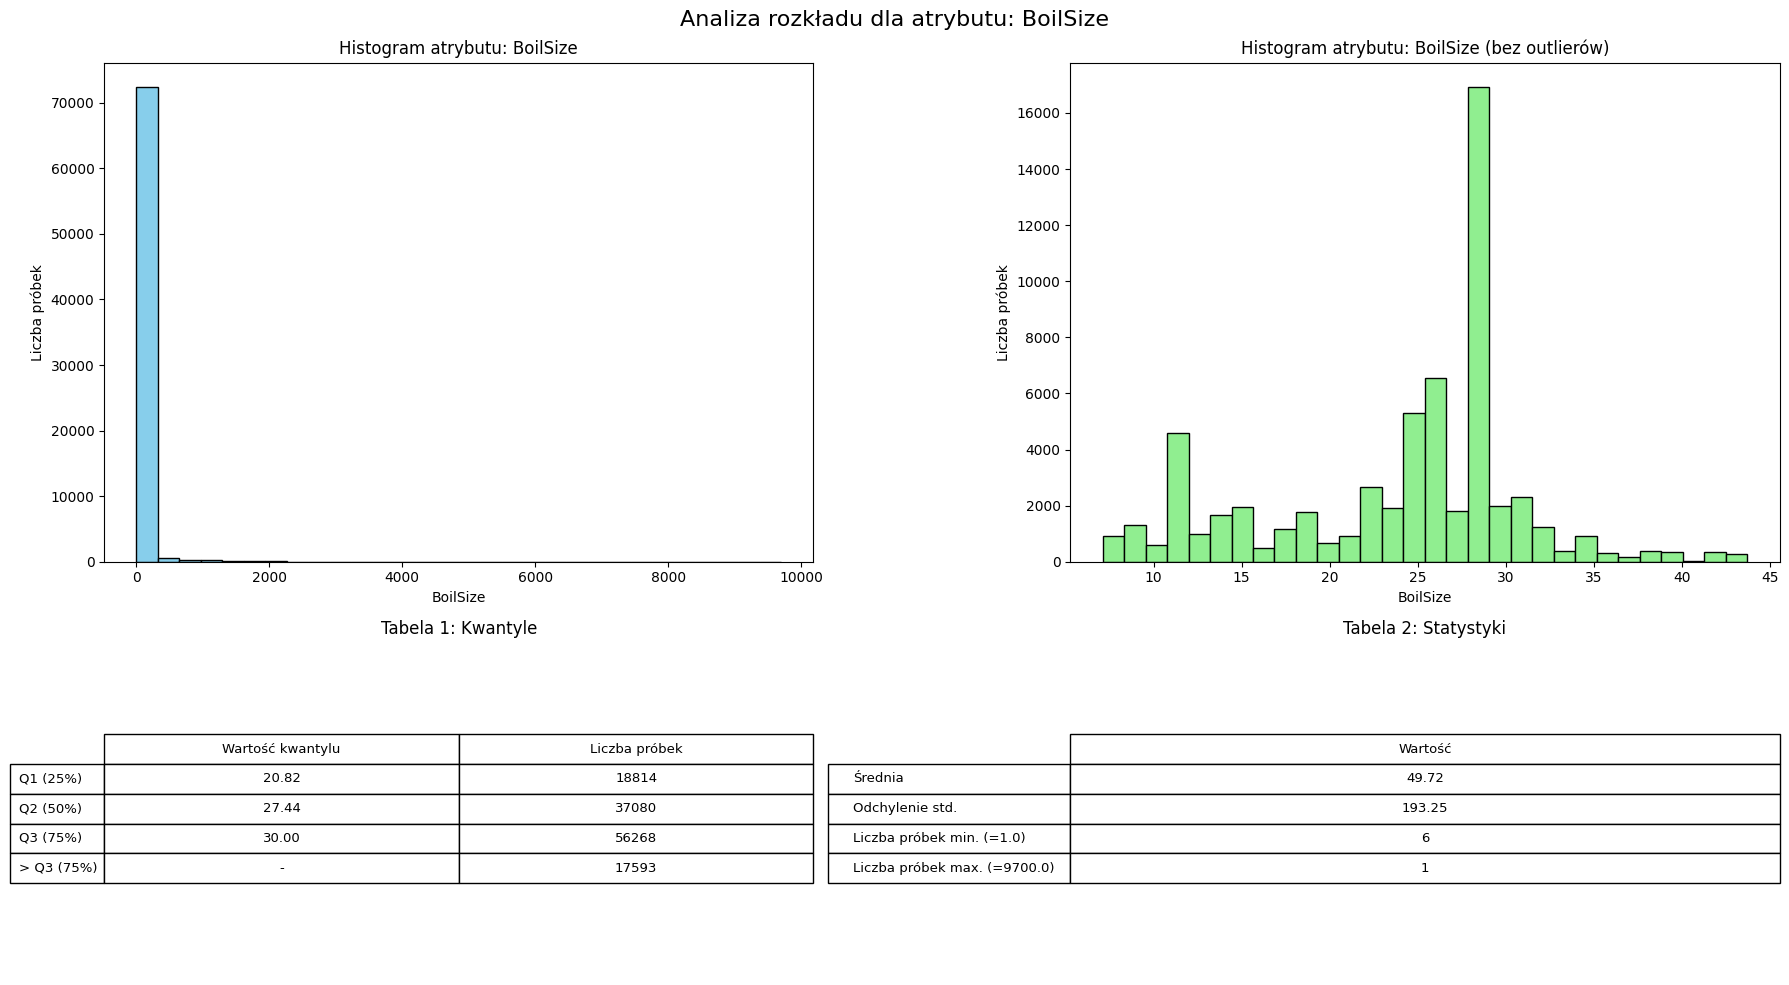

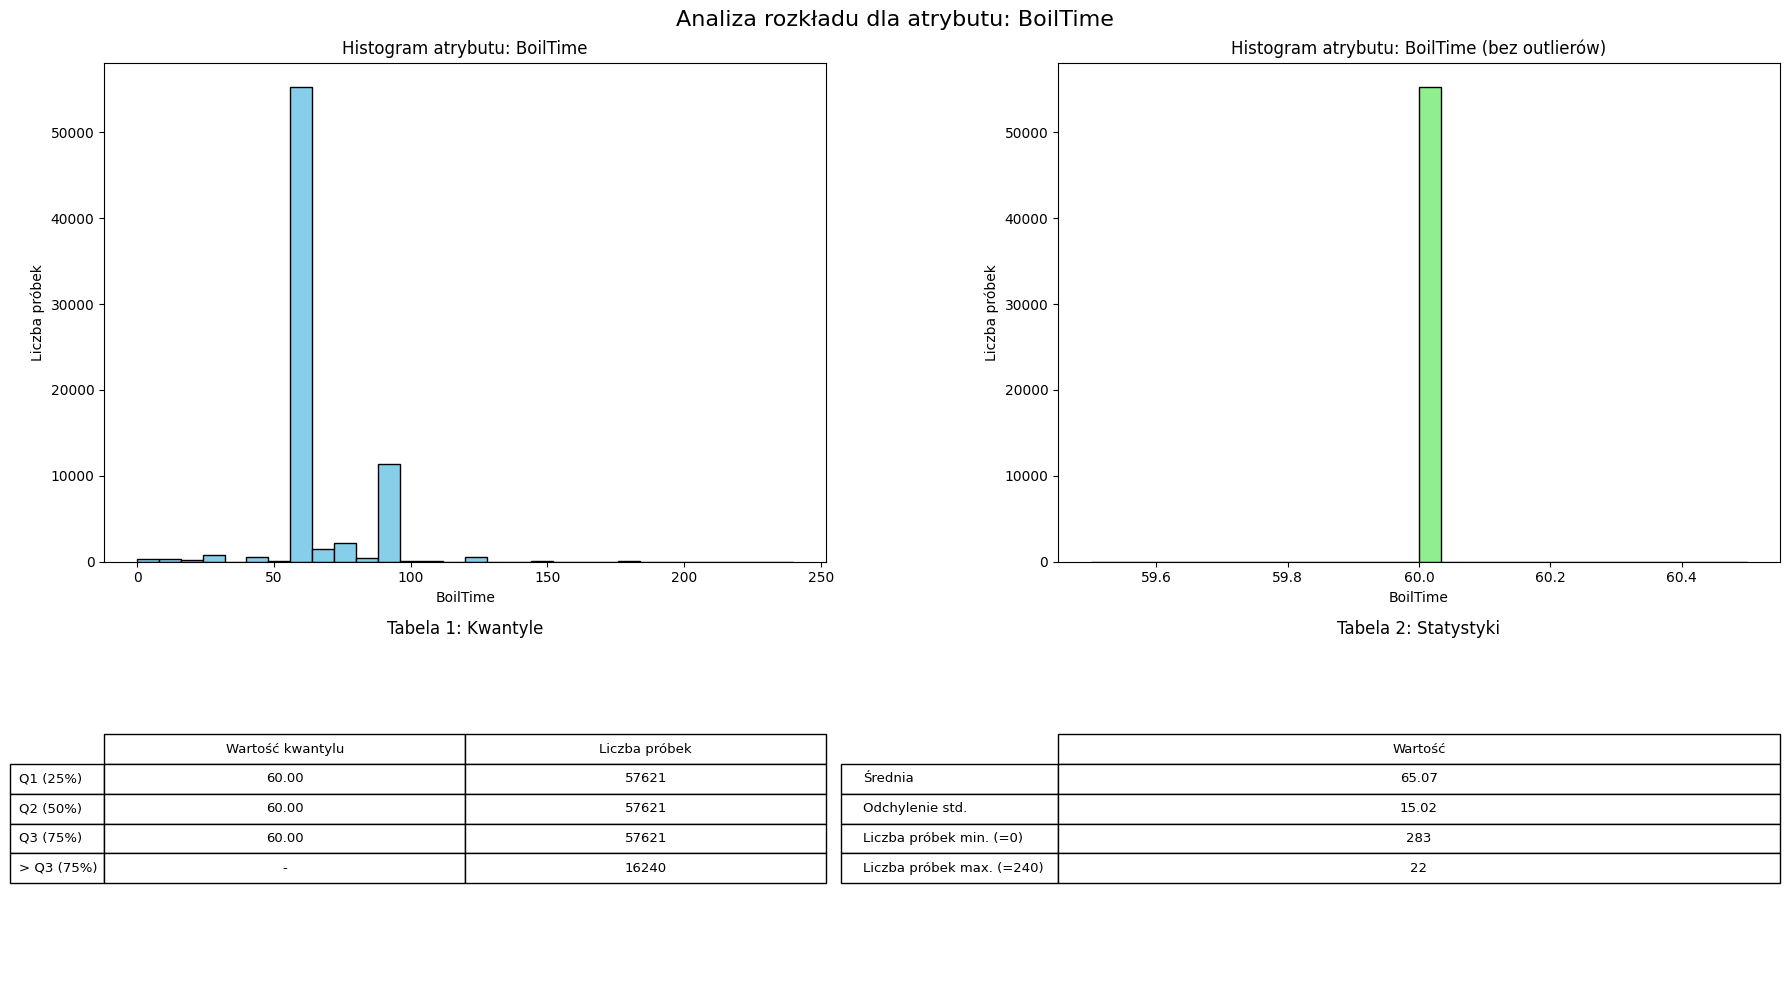

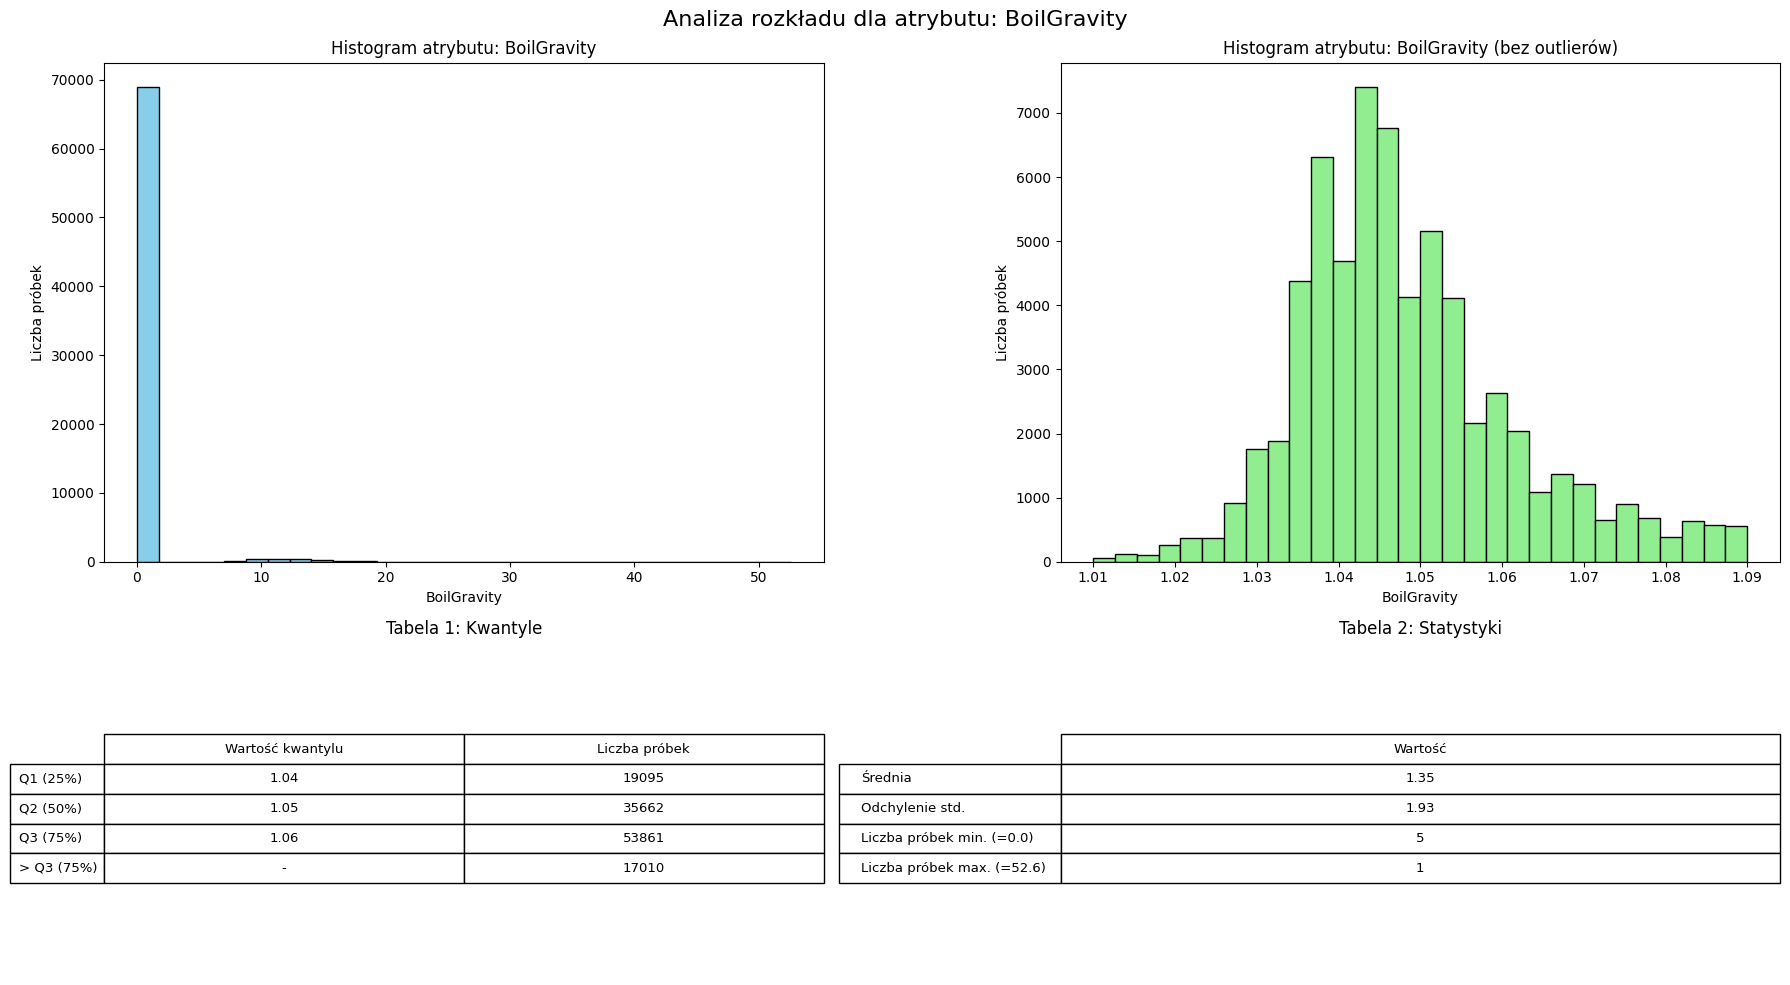

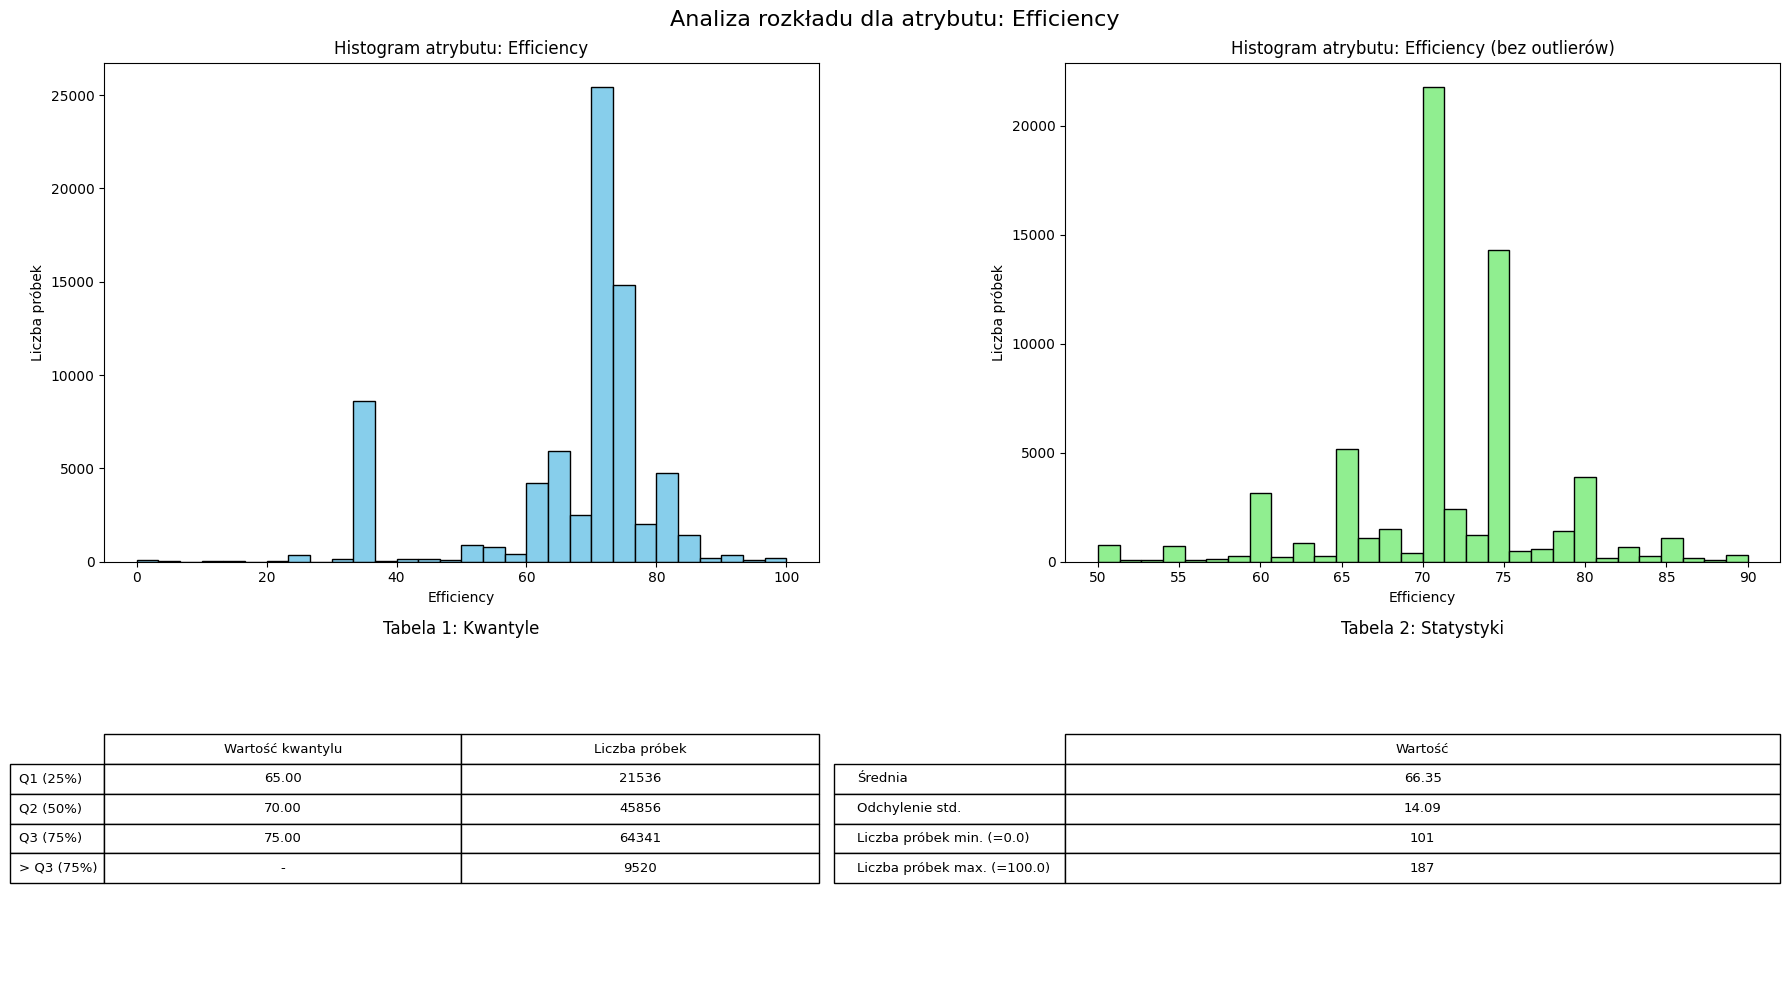

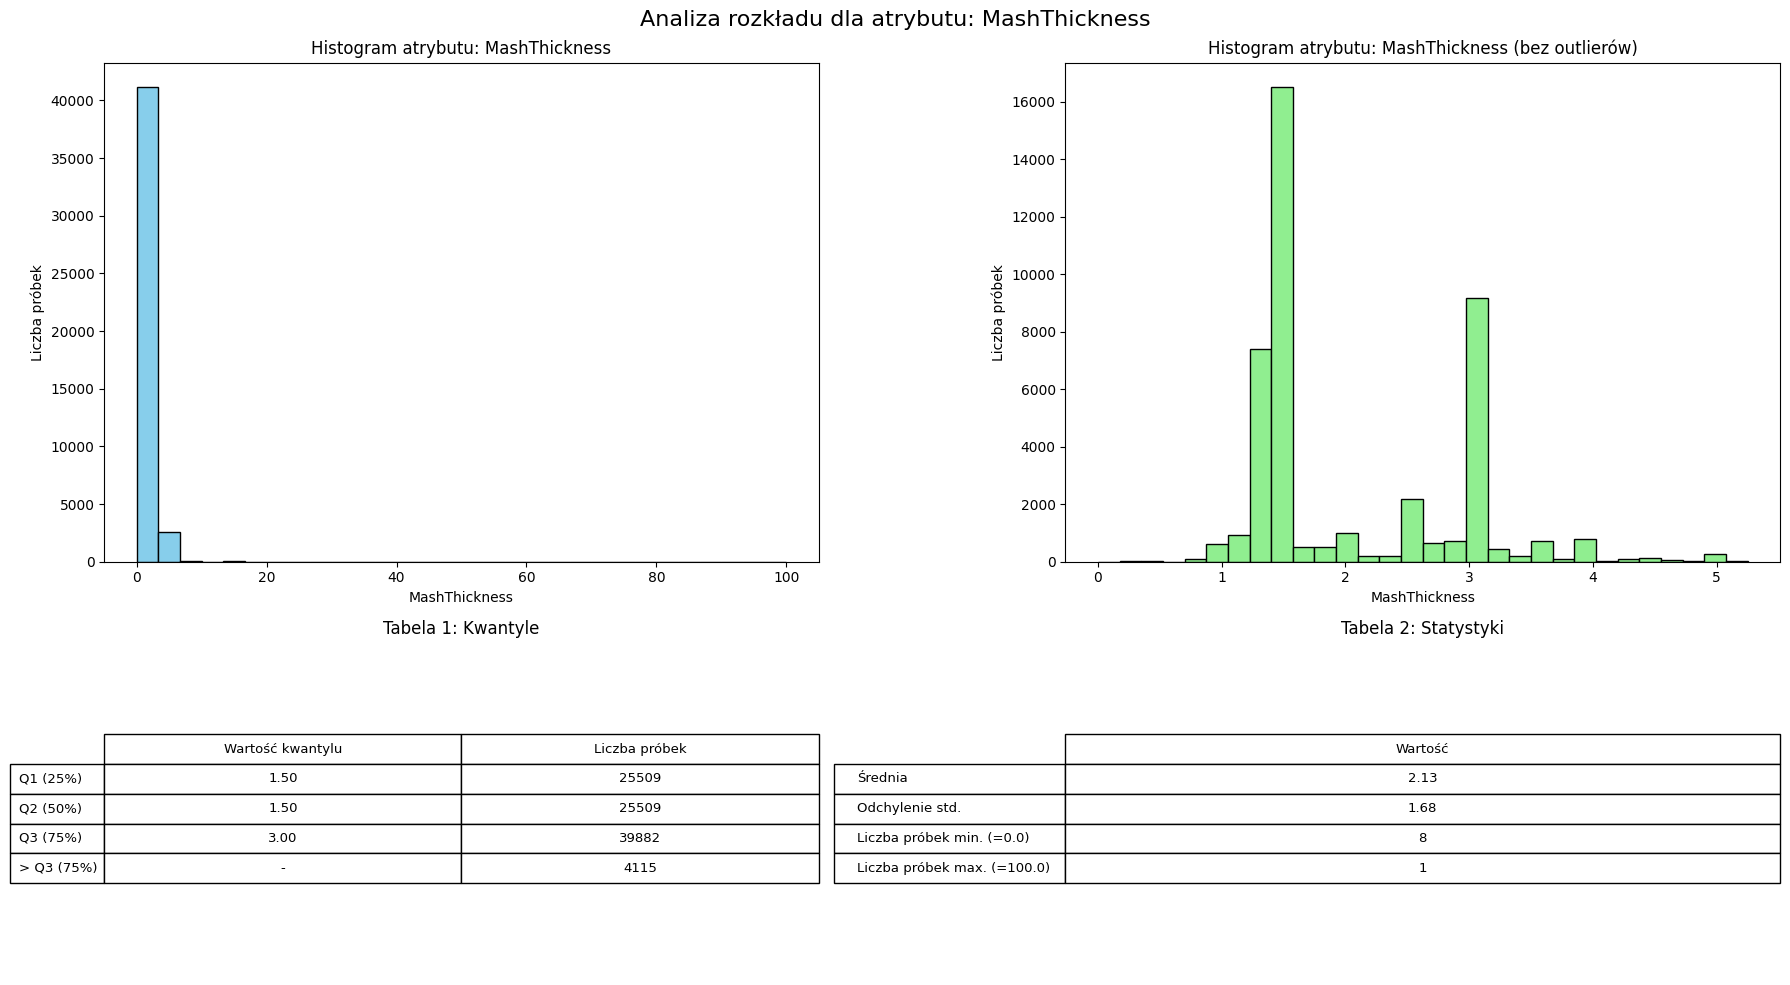

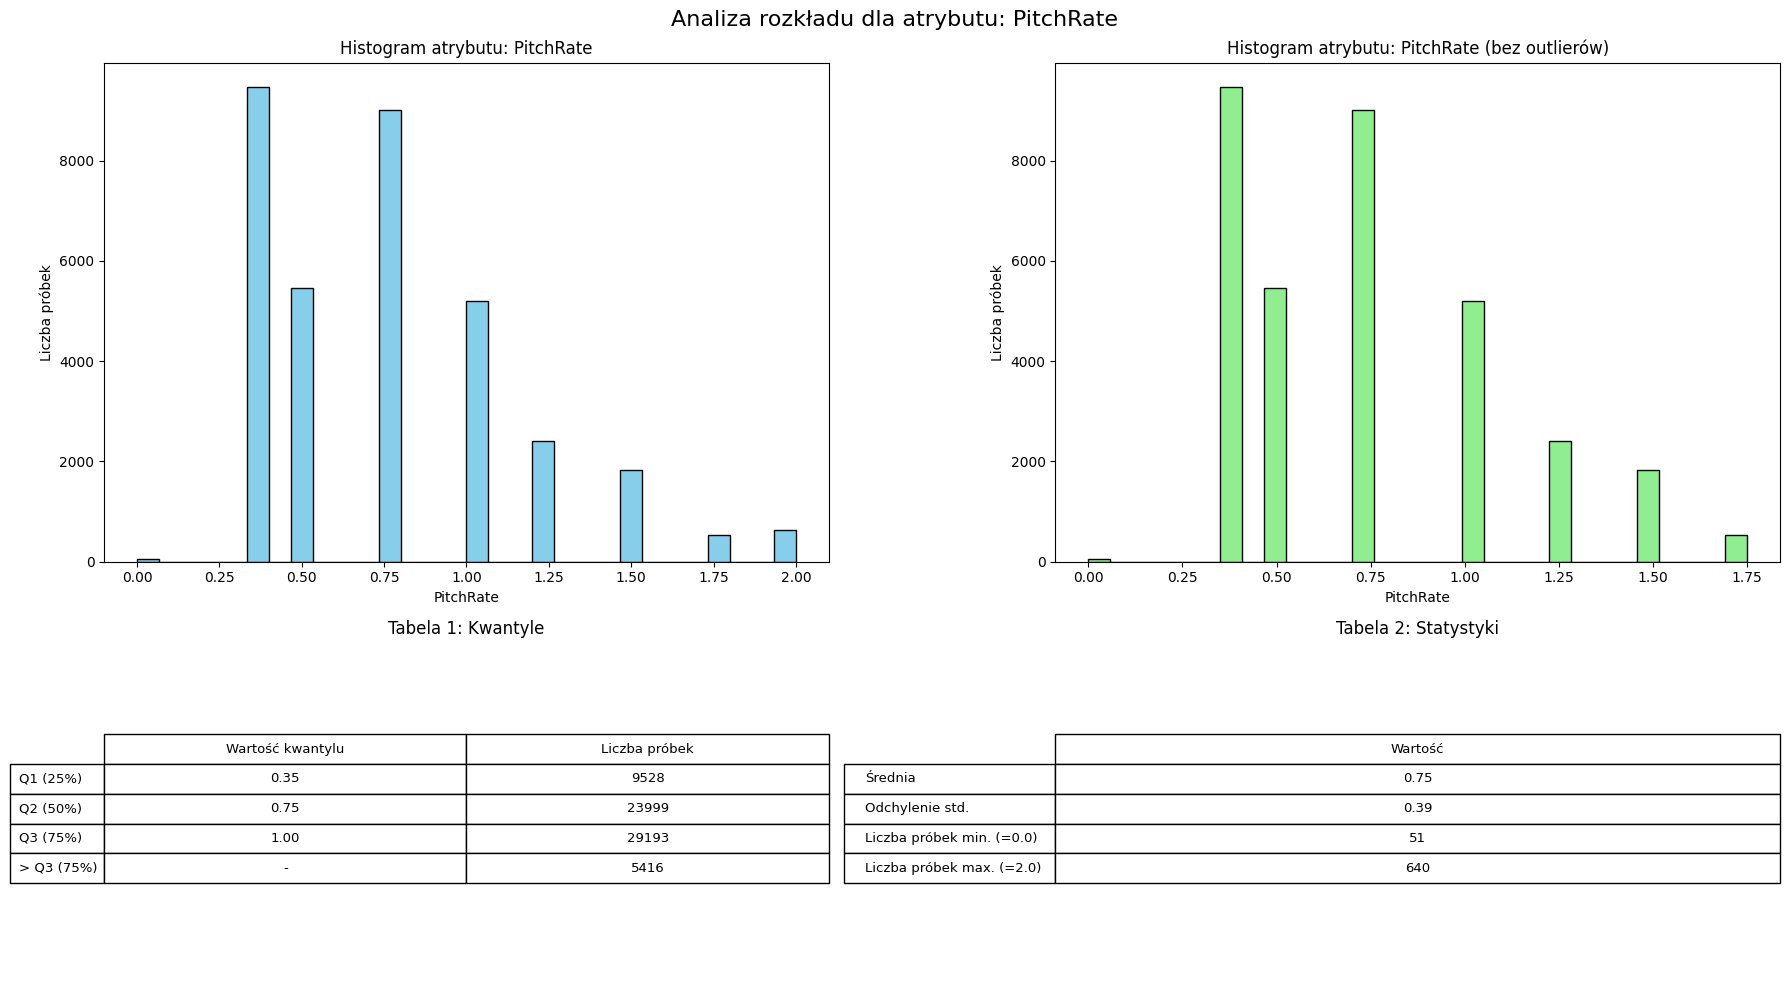

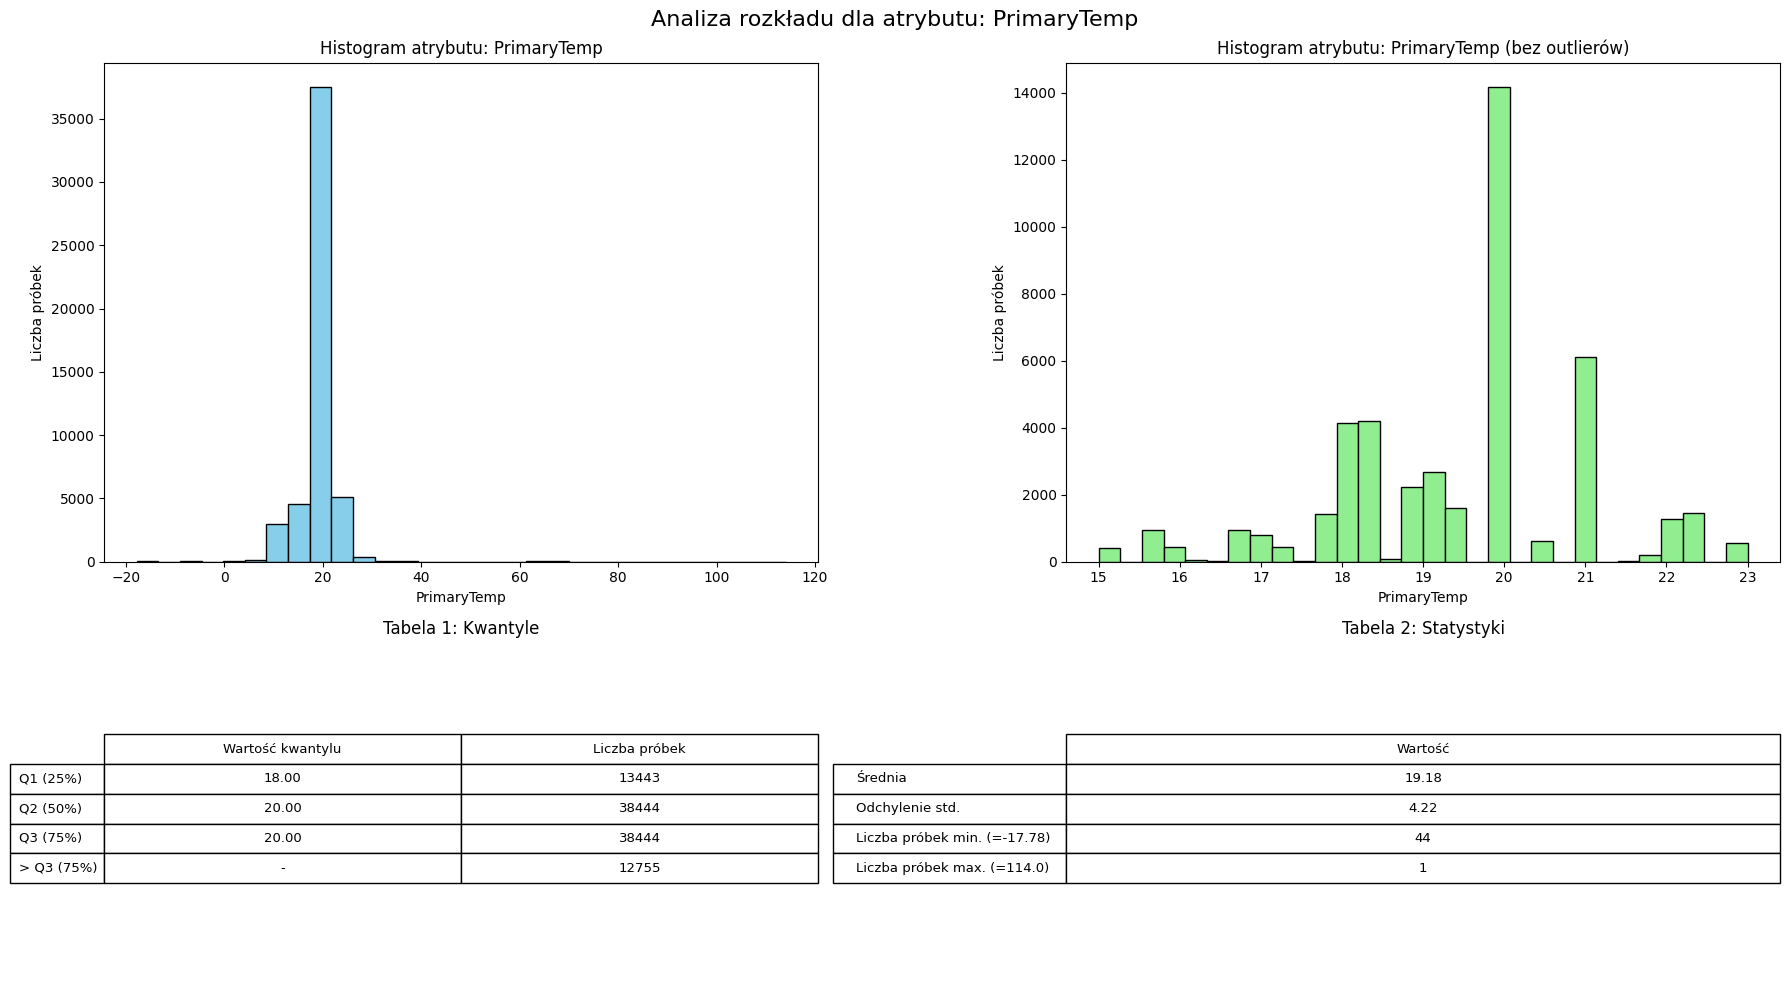

In [2]:
generate_histograms_for_dataset(recipe_data)

##### Wnioski z analizy rozkładów atrybutów numerycznych

1. Zmienne z dużą rozpiętością i obecnością outlierów

    - `Size(L)` i `BoilSize` charakteryzują się bardzo szerokim zakresem wartości (od 1 do 9200 i 9700 litrów), co wskazuje na obecność ekstremalnych, bardzo dużych partii piwa w danych. Większość próbek jednak mieści się w stosunkowo wąskim przedziale (około 11.8–30.7 l dla `Size(L)` i 7.05–43.77 l dla `BoilSize`), po odrzuceniu wartości odstających.

    - Wysokie odchylenia standardowe (180.37 dla `Size(L)` i 193.25 dla `BoilSize`) potwierdzają silną heterogeniczność w wielkości warzeń.

    - `OG` i `FG`, mimo że ich zakresy nominalne są niewielkie (około 1.0–1.1 po odrzuceniu outlierów), w oryginalnym zestawie pojawiły się skrajne wartości (np. `OG` do 34, a `FG` do ponad 23), które należy traktować jako błędy pomiarowe lub dane nieprawidłowe.

    - `ABV` ma zakres od 0 do ponad 54%, gdzie typowe wartości dla piwa są znacznie niższe (2.46–9.46% bez outlierów). Wskazuje to na obecność wartości odstających, które mogą być wynikiem błędów pomiarowych lub nietypowych produktów.

    - `IBU` wykazuje bardzo duży zakres (0–3409), gdzie po odrzuceniu outlierów mieści się w zakresie do około 106. Prawdopodobnie te ekstremalne wartości wynikają z błędów lub nietypowych, eksperymentalnych receptur.

    - `Color` ma szeroki zakres 0–186, jednak po wycięciu wartości odstających rozkład jest bardziej spójny i mieści się w typowych zakresach barwy piwa.

2. Zmienne o stosunkowo wąskich rozkładach

    - `BoilTime` jest wyjątkowo jednorodny: mediana, kwartyle oraz większość próbek wynoszą dokładnie 60 minut, co wskazuje na standardową, powtarzalną długość gotowania brzeczki.

    - `Efficiency` ma umiarkowany rozkład skoncentrowany w przedziale 50–90%, co jest zgodne z typowymi wartościami wydajności procesu warzenia.

    - `MashThickness` oraz `PitchRate` wykazują rozkłady z umiarkowanymi rozpiętościami, choć obecne są również wartości odstające (np. `MashThickness` do 100, co jest nietypowe).

    - `PrimaryTemp` ma przeciętną wartość około 19°C i typowy zakres między 15 a 23°C po usunięciu outlierów, co jest zgodne z praktykami piwowarskimi.

3. Ogólne obserwacje

    - W większości atrybutów można zauważyć obecność wartości odstających, które mogą wynikać z błędów pomiarowych, wpisów testowych lub wyjątkowych eksperymentów. W przypadku analiz predykcyjnych lub modelowania wskazane jest rozważenie ich usunięcia lub odpowiedniej transformacji danych.

    - Rozkłady wielu zmiennych są asymetryczne z ogonami po stronie wartości wysokich, co sugeruje, że typowe piwa mają raczej umiarkowane parametry, a wartości bardzo duże lub bardzo niskie są rzadkością.

    - Wartość odchylenia standardowego dla niektórych atrybutów jest znacznie wyższa od średniej, co dodatkowo potwierdza dużą zmienność i rozproszenie danych.

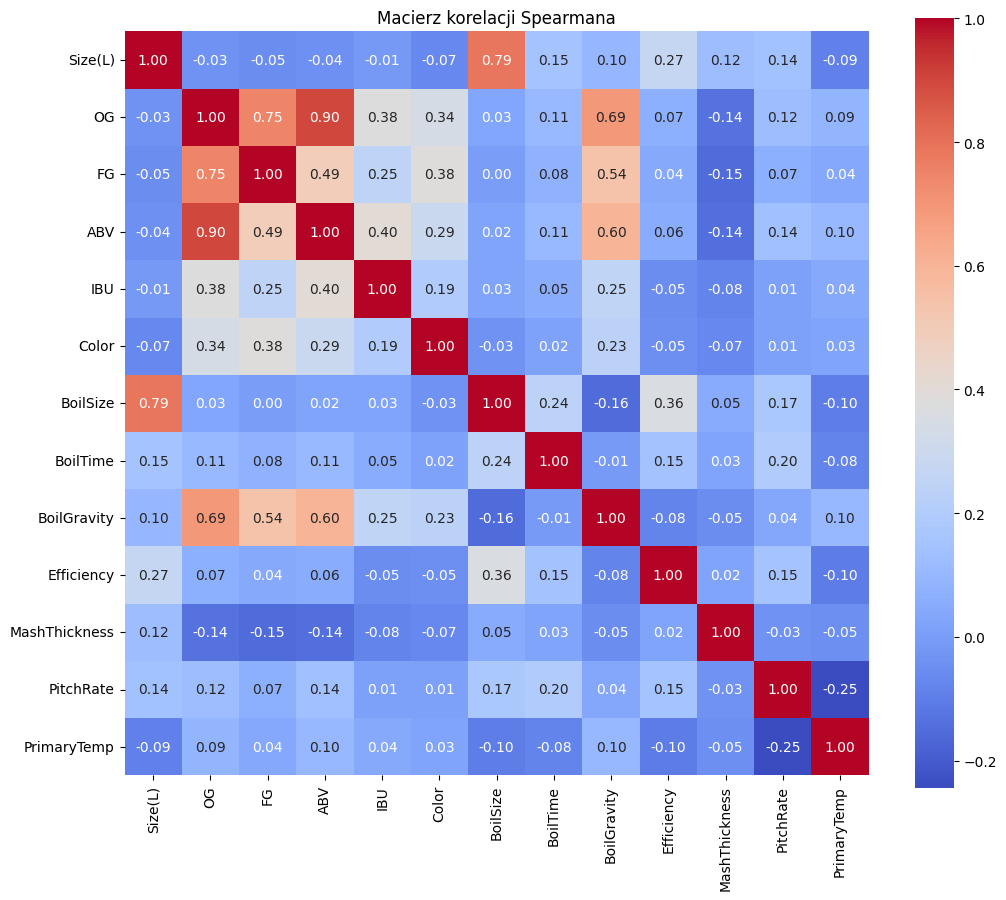

In [3]:
generate_spearman_matrix(recipe_data)

##### Wnioski z analizy korelacji
Na podstawie macierzy korelacji Spearmana, możemy zauważyć, że tylko część atrybutów jest ze sobą silnie skorelowana dodatnio, w macierzy najniższą wartością korelacji jest `-0.25`, co pokazuje, że w naszym zestawie danych nie występują silne korelacje ujemne.

Spośród najmocnniejszych korelacji, możemy zauważyć, że:
- `OG` ↔ `ABV` : korelacja = 0.90

    Bardzo silna dodatnia korelacja. `OG` oznacza początkową gęstość brzeczki, odzwierciedlającą stężenie cukrów możliwych do przekształcenia w alkohol w procesie fermentacji. Im wyższe `OG`, tym większy potencjał produkcji alkoholu, co przekłada się bezpośrednio na wyższy poziom `ABV`. Taka zależność jest zgodna z podstawowymi zasadami piwowarstwa.

- `Size(L)` ↔ `BoilSize` : korelacja = 0.79

    Silna korelacja między całkowitą objętością warzonego piwa a objętością brzeczki gotowanej. Wyższy wolumen końcowego produktu wymaga proporcjonalnie większej objętości brzeczki do gotowania, co tłumaczy wysoką zgodność między tymi zmiennymi.

- `OG` ↔ `FG` : korelacja = 0.75

    Również silna korelacja. Piwa o wyższej początkowej gęstości `OG` mają tendencję do zachowania wyższego poziomu cukrów resztkowych po fermentacji, co skutkuje wyższą końcową gęstością `FG`. Taka relacja odzwierciedla częściową efektywność procesu fermentacji.

- `OG` ↔ `BoilGravity` : korelacja = 0.69

    Umiarkowanie silna dodatnia korelacja. `BoilGravity` to gęstość brzeczki mierzona podczas gotowania. Jako że `OG` jest ostatecznym wynikiem rozcieńczania lub zagęszczania brzeczki po gotowaniu, wartości te są ze sobą logicznie powiązane.

- `ABV` ↔ `BoilGravity` : korelacja = 0.60

    Średnio silna korelacja. Wysoka gęstość brzeczki podczas gotowania sugeruje większą koncentrację cukrów, co przekłada się na wyższy potencjał alkoholowy (`ABV`). Zależność ta nie jest jednak tak silna jak w przypadku `OG`, ponieważ `BoilGravity` nie uwzględnia późniejszego rozcieńczania lub innych etapów produkcji.

- `FG` ↔ `BoilGravity` : korelacja = 0.54

    Umiarkowana korelacja. Brzeczki o wyższej gęstości podczas gotowania mogą prowadzić do piw o wyższym poziomie cukrów resztkowych, co skutkuje wyższym `FG`.

- `FG` ↔ `ABV` : korelacja = 0.49

    Relatywnie słaba dodatnia korelacja. Chociaż `ABV` w prostym modelu można wyliczyć jako różnicę pomiędzy `OG` a `FG`, to sama końcowa gęstość `FG` nie wystarcza do przewidywania zawartości alkoholu – istotny jest również punkt startowy fermentacji (`OG`).